In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator 

In [3]:
#val_data=keras.utils.image_dataset_from_directory(
#    directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 1 - Image classification of binary class\\test_set",
#    labels="inferred",
#    label_mode="int",
#    batch_size=32,
#    image_size=(256,256)
#)

In [4]:
train_datagen=ImageDataGenerator(rotation_range=30,
                            rescale=1.0/255,
                          shear_range=.2,
                          zoom_range=.2,
                           horizontal_flip=True,
                           width_shift_range=.2,
                           height_shift_range=.2
                            )

In [5]:
train_gen=train_datagen.flow_from_directory(    directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 1 - Image classification of binary class\\training_set",
    batch_size=32,
    target_size=(256,256),
    class_mode="binary")

Found 8005 images belonging to 1 classes.


In [6]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [7]:
test_gen=test_datagen.flow_from_directory( directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 1 - Image classification of binary class\\test_set",
    batch_size=32,
    target_size=(256,256),
    class_mode="binary")

Found 2023 images belonging to 2 classes.


In [8]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
history=model.fit_generator(train_gen,epochs=3,validation_data=test_gen)

C:\Users\Yadav\AppData\Local\Temp\ipykernel_7660\40523556.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen,epochs=3,validation_data=test_gen)


Epoch 1/3
251/251 [==============================] - 2020s 8s/step - loss: 0.0291 - accuracy: 0.9951 - val_loss: 96.7293 - val_accuracy: 0.4998
Epoch 2/3
251/251 [==============================] - 2023s 8s/step - loss: 5.5610e-04 - accuracy: 0.9999 - val_loss: 95.0794 - val_accuracy: 0.4998
Epoch 3/3
251/251 [==============================] - 1794s 7s/step - loss: 6.8292e-04 - accuracy: 0.9999 - val_loss: 111.8330 - val_accuracy: 0.4998


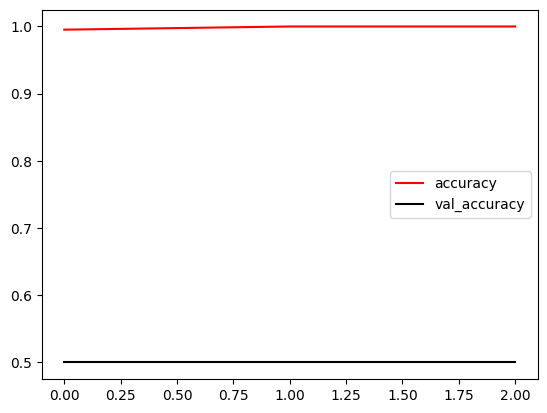

In [13]:
plt.plot(history.history["accuracy"],color="r",label="accuracy")
plt.plot(history.history["val_accuracy"],color="k",label="val_accuracy")
plt.legend()
plt.show()

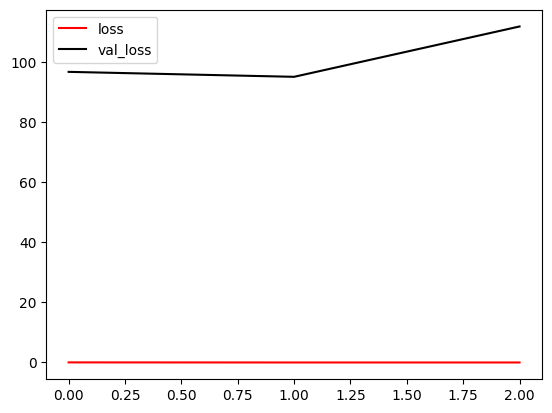

In [14]:
plt.plot(history.history["loss"],color="r",label="loss")
plt.plot(history.history["val_loss"],color="k",label="val_loss")
plt.legend()
plt.show()

In [17]:
history=pd.DataFrame(history.history)

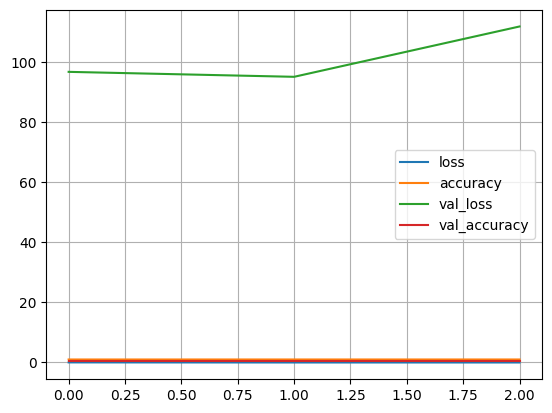

In [18]:
history.plot()
plt.grid()
#plt.plot(history.history["val_accuracy"],color="k",label="val_accuracy")
plt.legend()
plt.show()

In [19]:
model.save("my_model.h5")

In [20]:
import cv2

In [36]:
im=cv2.imread("C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 1 - Image classification of binary class\\pexels-pixabay-45201.jpg")

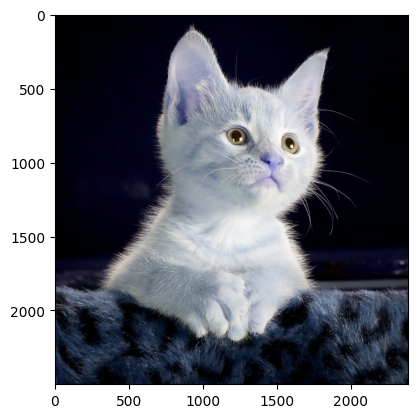

In [37]:
plt.imshow(im)

In [38]:
imag=cv2.resize(im,(256,256))

In [39]:
image=imag.reshape((1,256,256,3))

In [40]:
model.predict(image)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [42]:
pred_data=model.predict(test_gen)

64/64 [==============================] - 129s 2s/step


In [46]:
test_gen.class_indices

{'cats': 0, 'dogs': 1}

In [47]:
test_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
test_gen.filenames[0][5:]

'cat.4001.jpg'

In [74]:
model.predict(np.resize(test_gen[0][0],(1,256,256,3)))

1/1 [==============================] - 1s 516ms/step


array([[0.]], dtype=float32)